<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Image_neural_1/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [1]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms

img = read_image("C:/Users/klimk/Pictures/humans.jpg")

img = transforms.Resize((520, 520))(img)

weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

preprocess = weights.transforms(resize_size=None)

batch = preprocess(img)
batch = batch.unsqueeze(0)

with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

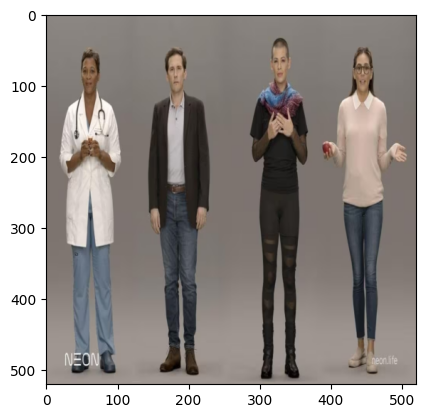

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0))

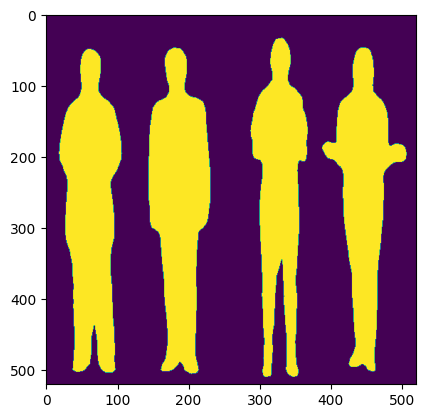

In [3]:
plt.imshow(mask)

In [4]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [5]:
mask.unique()

tensor([ 0, 15])

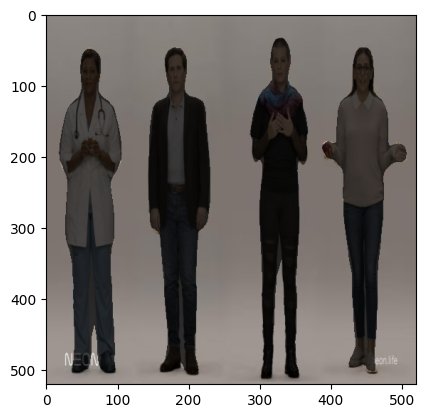

In [7]:
from torchvision.utils import draw_segmentation_masks

person_mask = mask == class_to_idx['person']

masked_img = draw_segmentation_masks(img, person_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

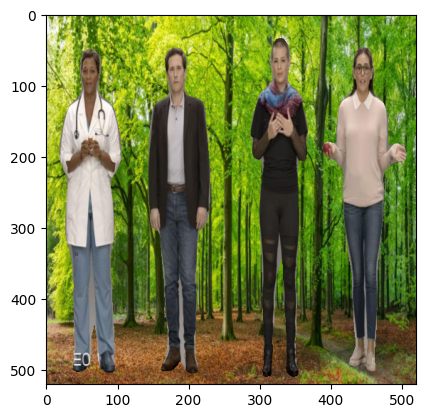

In [12]:
import matplotlib.pyplot as plt
import numpy as np

forest = read_image("C:/Users/klimk/Pictures/forest.jpg")
forest = transforms.Resize((520, 520))(forest).float()

masked_img = img.clone().float()

masked_img[:, ~person_mask] = forest[:, ~person_mask]

masked_img = draw_segmentation_masks(masked_img.to(torch.uint8), cat_mask, alpha=0)

plt.imshow(masked_img.permute(1, 2, 0).numpy().astype(np.uint8))
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [28]:
import os
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')

input_folder = 'C:/Users/klimk/Desktop/upscayl_ultramix_balanced_x2'
output_folder = 'C:/Users/klimk/Desktop/Highway_detection'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        results = model.predict(source=image,
                                conf=0.1,
                                iou=0.9,
                                imgsz=1024)

        output_image = results[0].plot()
        output_image_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_image_path, output_image)


0: 1024x576 2 cars, 2 traffic lights, 10.0ms
Speed: 4.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 576)

0: 1024x576 2 cars, 8.0ms
Speed: 4.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 576)

0: 1024x576 4 cars, 1 stop sign, 7.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 576)

0: 1024x576 4 cars, 4 traffic lights, 7.5ms
Speed: 4.0ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 576)

0: 1024x576 5 cars, 2 traffic lights, 1 baseball bat, 7.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 576)

0: 1024x576 2 cars, 1 traffic light, 7.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 576)

0: 1024x576 2 persons, 1 car, 1 traffic light, 1 frisbee, 8.0ms
Speed: 4.5ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 102

# Результат
https://youtube.com/shorts/SnfwHKLX3Zc

# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\klimk\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

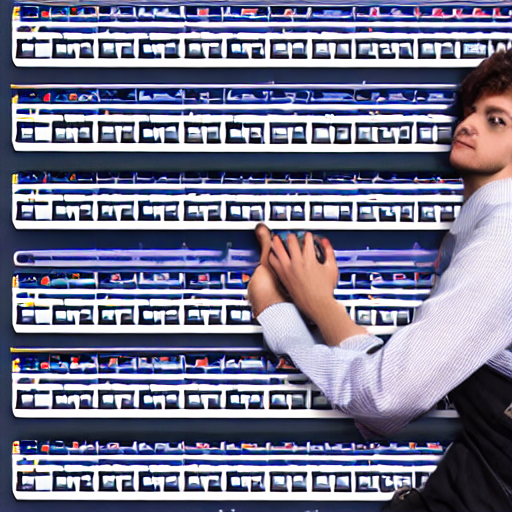

In [19]:
image = pipeline(
	"programmer"
).images[0]
image